<a href="https://colab.research.google.com/github/saikumar28102000/INTERN-SPARK/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 3- Exploratory Data Analysis - Retail**

Author: Sai Kumar T S

### Goal: 1. Perform 'Exploratory Data Analysis' on dataset Sample Superstore.

---

### 2. Explore the weak areas to increase profits.

Dataset : https://bit.ly/3i4rbWl

## Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Superstore Dataset

In [ ]:
store = pd.read_csv('SampleSuperstore.csv')

In [ ]:
store.shape

(9994, 13)

## Data Preprocessing and Analysis

In [ ]:
# first five rows
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
# last five rows
store.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [ ]:
## find duplicates 
store.duplicated().sum()

17

In [ ]:
## remove duplicats
store.drop_duplicates(keep= 'first', inplace = True)

In [ ]:
## new shape after removing duplicates
store.shape

(9977, 13)

In [ ]:
## checking null values
store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
## drop Postal code column as it is insignificant 
store.drop('Postal Code', axis = 1, inplace= True)

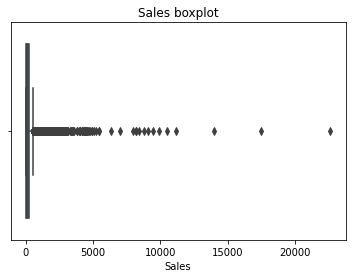

In [ ]:
## checking for sales outliers
sns.boxplot(x= store['Sales'])
plt.title('Sales boxplot')
plt.show()

There are 3 outliers in sales.

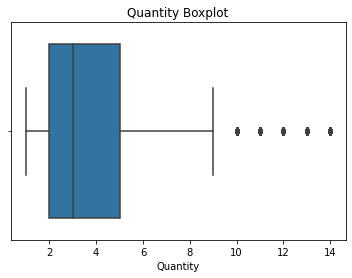

In [ ]:
## checking for  Quantity outliers
sns.boxplot(x = store['Quantity'])
plt.title('Quantity Boxplot')
plt.show()

There are 5 outliers in quantity column.

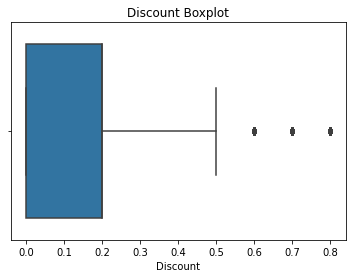

In [ ]:
## checking for Discount outliers
sns.boxplot(x =store['Discount'])
plt.title('Discount Boxplot')
plt.show()

There are 3 outliers in discount column.

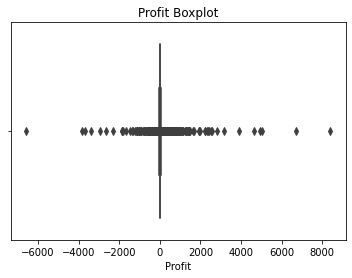

In [ ]:
## checking for Profit outliers
sns.boxplot(x =store['Profit'])
plt.title('Profit Boxplot')
plt.show()

In [ ]:
## Calculate IQR -- Interquartile range
Q1=store.quantile(0.25)  ## middle value in first half
Q3=store.quantile(0.75)  ## middle value in third half
IQR=Q3-Q1
print(IQR)

Sales       192.6700
Quantity      3.0000
Discount      0.2000
Profit       27.6458
dtype: float64


In [ ]:
## lower and upper bounds
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
print('Lower bound\n',lower_bound)
print('Upper bound \n', upper_bound)

Lower bound
 Sales      -271.7050
Quantity     -2.5000
Discount     -0.3000
Profit      -39.7425
dtype: float64
Upper bound 
 Sales       498.9750
Quantity      9.5000
Discount      0.5000
Profit       70.8407
dtype: float64


In [ ]:
## Remove outliers
store = store[~((store < lower_bound) |(store > upper_bound)).any(axis=1)]
store.shape

(7127, 12)

After removing outliers and duplicates, shape of new data is (7127,12), original data shape: (9994,13)

Standard Class    4239
Second Class      1405
First Class       1098
Same Day           385
Name: Ship Mode, dtype: int64

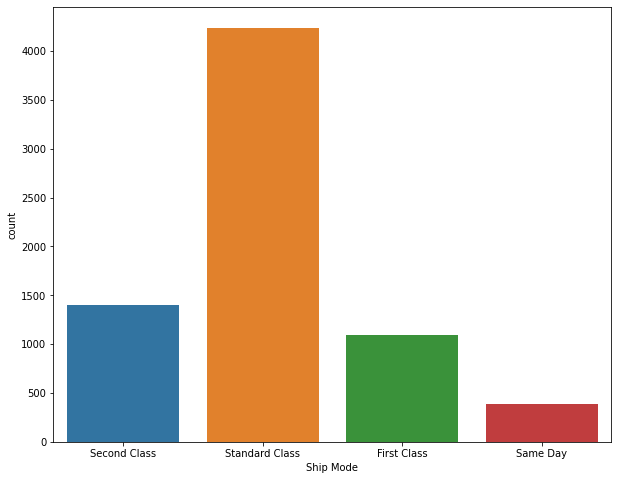

In [ ]:
## four types of shipping modes
plt.figure(figsize=(10,8))
sns.countplot(x=store['Ship Mode'])
store['Ship Mode'].value_counts()

Standard Class is mostly used method of Shipping

Consumer       3725
Corporate      2137
Home Office    1265
Name: Segment, dtype: int64

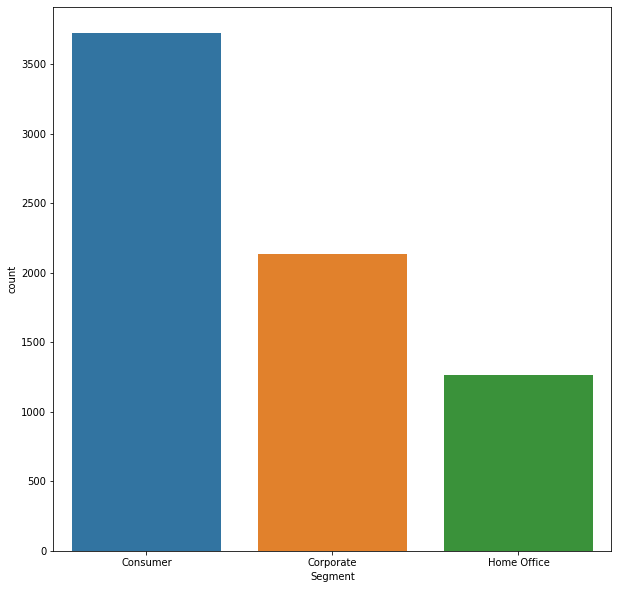

In [ ]:
## three segments 
plt.figure(figsize=(10,10))
sns.countplot(x=store['Segment'])
store['Segment'].value_counts()

Consumer is biggest segment

West       2484
East       2039
Central    1441
South      1163
Name: Region, dtype: int64

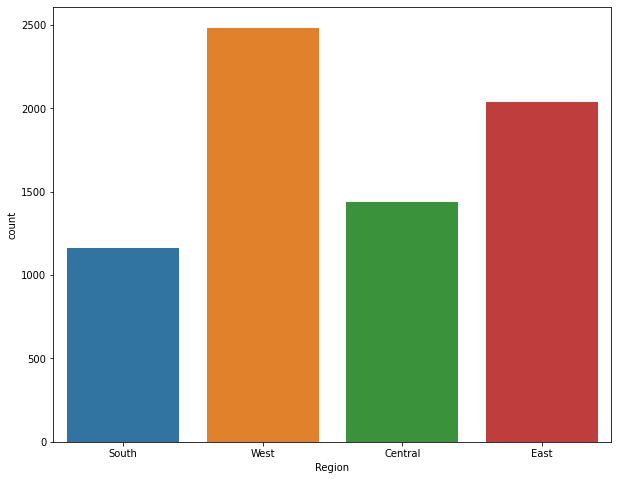

In [ ]:
## region 
plt.figure(figsize=(10,8))
sns.countplot(x=store['Region'])
store['Region'].value_counts()

West region is generating most sales and south region - least.

In [ ]:
## data is only for one country
store['Country'].unique()

array(['United States'], dtype=object)

In [ ]:
## number of cities
store['City'].nunique()

508

In [ ]:
## list of states -- and sales amount
store['State'].value_counts()

California              1601
New York                 869
Texas                    565
Washington               399
Pennsylvania             369
Ohio                     305
Florida                  259
Illinois                 248
Michigan                 187
North Carolina           171
Virginia                 167
Arizona                  150
Georgia                  136
Tennessee                135
Colorado                 117
Indiana                  110
Kentucky                 101
Massachusetts            100
New Jersey                98
Oregon                    86
Maryland                  81
Delaware                  74
Wisconsin                 74
Minnesota                 67
Connecticut               62
Missouri                  54
Arkansas                  45
Oklahoma                  45
Alabama                   44
Utah                      42
Rhode Island              39
Mississippi               38
South Carolina            34
Louisiana                 33
Nebraska      

Most sales are from California State.

Office Supplies    4670
Furniture          1262
Technology         1195
Name: Category, dtype: int64

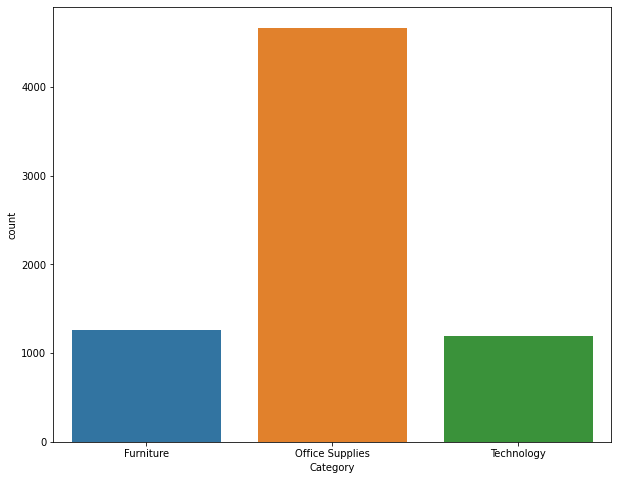

In [ ]:
## three categories
plt.figure(figsize=(10,8))
sns.countplot(x=store['Category'])
store['Category'].value_counts()

Office supplies category is generating most sales.

Paper          1225
Binders         784
Art             778
Furnishings     737
Storage         632
Accessories     601
Phones          573
Labels          346
Chairs          320
Appliances      296
Envelopes       226
Fasteners       211
Supplies        172
Bookcases       113
Tables           92
Machines         18
Copiers           3
Name: Sub-Category, dtype: int64

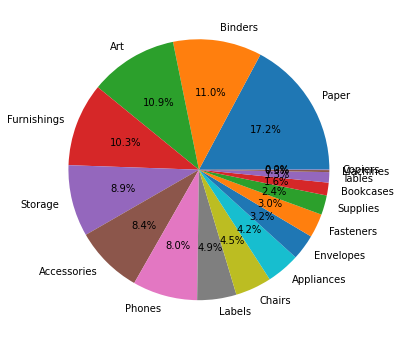

In [ ]:
## sub-category
plt.figure(figsize=(6,6))
plt.pie(store['Sub-Category'].value_counts(),labels=store['Sub-Category'].value_counts().index,autopct='%1.1f%%')
store['Sub-Category'].value_counts()

Papers are most sold products while copeiers are least.

In [ ]:
store.describe()

,Sales,Quantity,Discount,Profit
count,7127.000000,7127.000000,7127.000000,7127.000000
mean,75.736720,3.407745,0.096805,13.008233
std,92.175172,1.880857,0.106368,17.200106
min,0.990000,1.000000,0.000000,-39.637000
25%,15.552000,2.000000,0.000000,3.239200
50%,37.880000,3.000000,0.000000,8.299200
75%,98.426000,5.000000,0.200000,19.627650
max,496.860000,9.000000,0.500000,70.722000


## Data Visualization

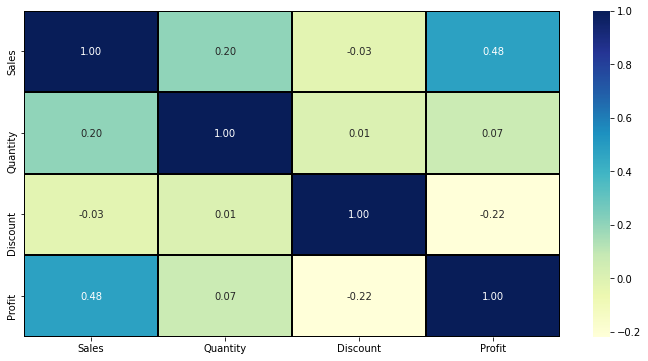

In [ ]:
## Heatmap for getting correlation among numerical values holding labels -- Sales, Quantity, Discount, Profit
plt.figure(figsize=(12,6))
sns.heatmap(store.corr(), cmap = 'YlGnBu', linewidths= 1, linecolor='Black', fmt = '.2f', annot = True)

Conclusions from Heatmap:
1. A good positive coorelation between Profit and Sales.
2. Negative correlation between sales and discount meaning sales dicreases with increase in discount. **Important to note.
3. There is no correlation of Quantity with other three features.
4. Negative correlation between discount and profit.

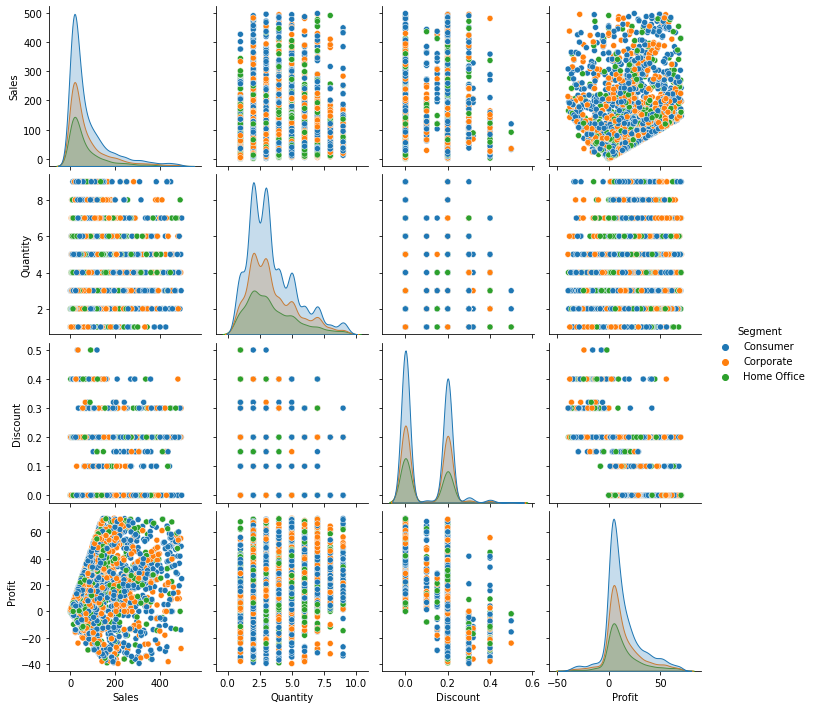

In [ ]:
## Pairplot
sns.pairplot(store, hue = 'Segment')
plt.show()

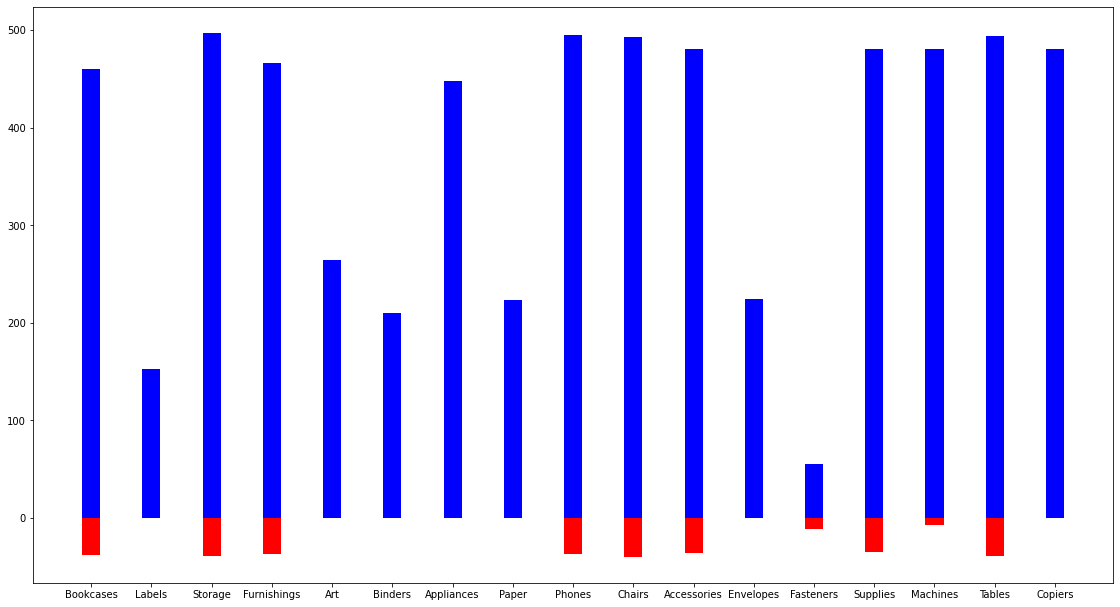

In [ ]:
## Profit on a product from sub-category compared with sales
fig,ax=plt.subplots(figsize=(15,8))
ax=fig.add_axes([0,0,1,1])
x=store['Sub-Category']
ax.bar(x,store['Profit'],color='red',width=0.3)
ax.bar(x,store['Sales'],color='blue',width=0.3)
plt.show()

Many products with good sales are not giving any profit. It's a big concern for store. 

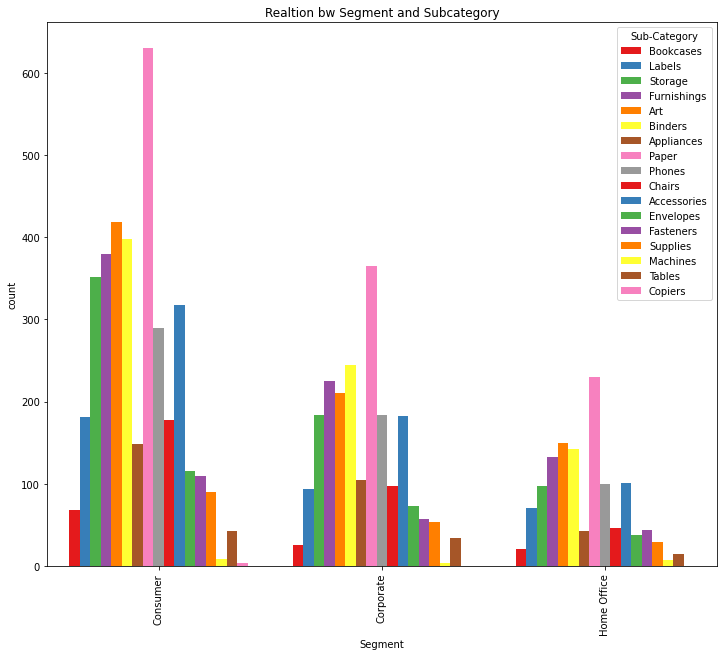

In [ ]:
## countplot for Segment and subcategory
plt.figure(figsize=(12,10))
sns.countplot(x=store['Segment'],hue=store['Sub-Category'],palette='Set1',saturation=1,linewidth=30)
plt.xticks(rotation=90)
plt.title('Realtion bw Segment and Subcategory')
plt.show()

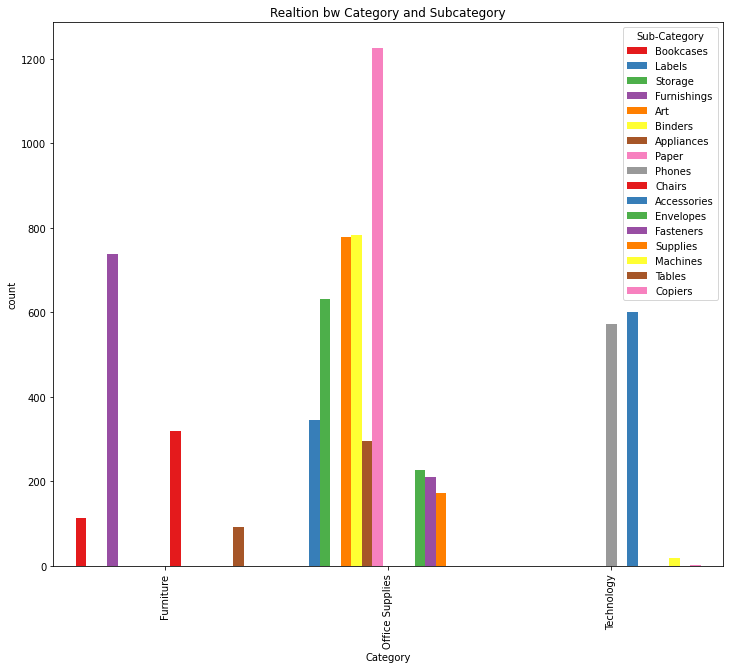

In [ ]:
## countplot for category and sub- category
plt.figure(figsize=(12,10))
sns.countplot(x=store['Category'],hue=store['Sub-Category'],palette='Set1',saturation=1,linewidth=10)
plt.xticks(rotation=90)
plt.title('Realtion bw Category and Subcategory')
plt.show()

# Conclusions from given data: 

1. Standard Class is mostly used method of Shipping while Same day is least opt method.
2. Consumer is biggest segment while home office is smallest segment.
3. West region is generating most sales and south region - least.
4. Office suplies category generating most sales - 
Subcategory - Max. - Papers , Min. - Supplis
Technology category generating least sales - 
Subcategory - Max. - Accessoris , Min. - Copiers
5. A good positive coorelation between Profit and Sales -- As sales increases , profit also increase.
6. Negative correlation between sales and discount meaning sales decreases with increase in discount. **Important to note.-- Discount policy need to be checked, as it is making negative impact on sales.
7. Negative correlation between discount and profit -- Discount is making loss to store, also decreasing sales, so keep check on discounts.
8. Many products with good sales are not giving any profit. It's a big concern for store. -- Store should find out the reasons for this problem and try to solve very soon. 